<div>
<img src="attachment:image.png" width="600"/>
</div>

<div>
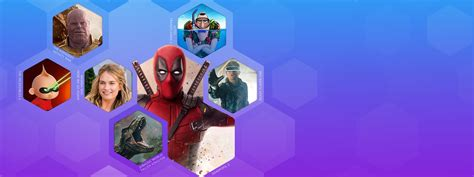
</div>

# Microsoft Movie Studio Data Analysis
---

**Authors**: [Andrew Bernklau](andrewbernklau1@gmail.com), [Kelsey Lane](kelsklane@gmail.com), [Lenore Perconti](lenorephotography@gmail.com)

## Overview
---

This project analyzes various [IMDb](https://www.imdb.com) datasets related to films in order to formulate relevant reccomendations for the direction of Microsoft's new movie studio. Exploration of this data shows that movies that are in the action or drama genre have a higher average rating and **? runtimes** are preferred. A shortlist of recommended directors and writers for these genres is also provided.

## Business Problem
---
In order to help establish its new studio, Microsoft should focus on producing original content in the drama or action genres, as these genres produce a higher rating on average. By following these reccomendations, Microsoft can better their chances of producing high rating movies and help establish their new studio as a powerhouse. 

## Data
---
[IMDB](https://www.imdb.com) is a public, online database with information about video media content and ratings of movies, which can be used to gage public sentiment towards different films. The IMDb datasets provide information about basic movie and crew information, as well as their ratings, which we used in this analysis. There are also unique IDs associated with both films and people to ensure there is no confusion with similarly named features. Most of these datsets were combined into one, named imdb, in order to facilitate the exploration of the data, though the basic descriptions of crew were kept seperate to help keep the data cleaner for the inital exploration.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
imdb = pd.read_csv('Data/imdb.csv')
imdb.head(3)

,tconst,primary_title,start_year,genres,runtime_minutes,directors,writers,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,2018,Drama,122.0,nm0000080,"nm0000080,nm0462648",6.9,4517
1,tt0315642,Wazir,2016,"Action,Crime,Drama",103.0,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",7.1,15378
2,tt0360556,Fahrenheit 451,2018,"Drama,Sci-Fi,Thriller",100.0,nm1023919,"nm0001969,nm1023919,nm0618881",4.9,14469


In [4]:
imdb_name_basics = pd.read_csv('Data/imdb_name_basics_slim')
imdb_name_basics.head(3)

,nconst,primary_name,death_year
0,nm0061671,Mary Ellen Bauder,NaN
1,nm0061865,Joseph Bauer,NaN
2,nm0062070,Bruce Baum,NaN


## Data Preparation

The full list of datasets used included the basic movie title and crew information, the title crew information, and title rankings. The name basics dataframe is read in seperatly above.

In [5]:
imdb_title_basics = pd.read_csv('Data/imdb.title.basics.csv.gz', compression='gzip')
imdb_title_crew = pd.read_csv('Data/imdb.title.crew.csv.gz', compression='gzip')
imdb_title_ratings = pd.read_csv('Data/imdb.title.ratings.csv.gz', compression='gzip')

### Data Cleaning

The datasets were paired down to only include the tconst column, which is the unique ID for each movie title, as well as the primary_title column to be able to grab any specific well-preforming movie in an understandable way. The start_year and number of votes columns are also included to help appropriately filter the data. As we are looking for the best rated genres, as well as their average runtime and highest rated directors and writers, the appropriate columns are also included to allow for this analysis. Any additional columns that wouldn't be used are thus not included and the original column names are kept as they are straightforward.

In [6]:
#Pairs the original datasets down to the relevant columns
imdb_title_basics_slim = imdb_title_basics[['tconst', 'primary_title', 'start_year', 'genres', 'runtime_minutes']]
imdb_name_basics_slim = imdb_name_basics[['nconst', 'primary_name', 'death_year']]
imdb_title_ratings_slim = imdb_title_ratings[['tconst', 'averagerating', 'numvotes']]

We focused on a subset of the full IMDb data that only contains movies released in the last five years (2014-2018 for the purposes of the given data), in order to ensure that any reccomendations relate to current market trends. We also limited the dataset down to movies that had a number of votes greater than or equal to the mean number of votes (3,524) so that we could root out any films that had a small but dedicated audience. While we considered using the median number of votes here it only came out to 49 total votes, which seemed too small to properly represent a broad public sentiment.

In [7]:
#Pairs the appropriate datasets read in above down by the restrictions listed
recent_imdb_title_basics = imdb_title_basics_slim[(imdb_title_basics_slim['start_year'] >= 2014) 
                                                  & (imdb_title_basics_slim['start_year'] <= 2018)]
imdb_title_ratings_half = imdb_title_ratings_slim[imdb_title_ratings_slim['numvotes'] >= 
                                                  imdb_title_ratings_slim['numvotes'].mean()]

### Data Merging

We then merged the resulting datasets together using an inner merge to make sure we were only looking at movies that had all the data we were going to explore.

In [8]:
one = recent_imdb_title_basics.merge(imdb_title_crew, how = 'inner')
imdb = one.merge(imdb_title_ratings_half, how = 'inner')
#Save cleaned dataset as CSV file
imdb.to_csv('Data/imdb.csv', index = False)

This left us with a data set with only 2,549 rows, going down from 146,144 entries in the original IMDb datasets. This obviously provides us with less data to work with and may not be a fully accurrate representation of current trends. Also, as only the IMDb datasets are used, this can skew out results as IMDb may not be a good representation of the opinios of the general populace. **any other limitations?**

### IMDb_name_basics

IMDb name basics is included seperately in order to help keep the original IMDb data neat, as its inclusion would duplicate movie rows. Therefore, it is brought in later on when the crew data is analyzed on so that there are not accidental duplicates in the analysis of the genres and runtime. The original dataset is slimmed down to only include the nconst column that uniquely identifies each crew member, as well as their name to know what each ID tag refers to, as well as their death year to prevent any reccomendations of dead directors or writers. However, as this data only dates back to 2018, there may be directors and writers in the list that are currently dead, but that information is not in the dataset yet.

In [9]:
imdb_name_basics_slim = imdb_name_basics[['nconst', 'primary_name', 'death_year']]
imdb_name_basics_slim.to_csv('Data/imdb_name_basics_slim', index = False)

## Analysis

In [10]:
import code.visuals as vis

### Genre

- Include finding aka summary stat to support recommendation
- Explain why finding supports the recomendation
- Explains how rec would help new studio succeed

#### Genre Visualization

- Help stakeholder understand value to project
- have labels and marks to aid visualization
- use color/size and or location ot facilitate comparisons

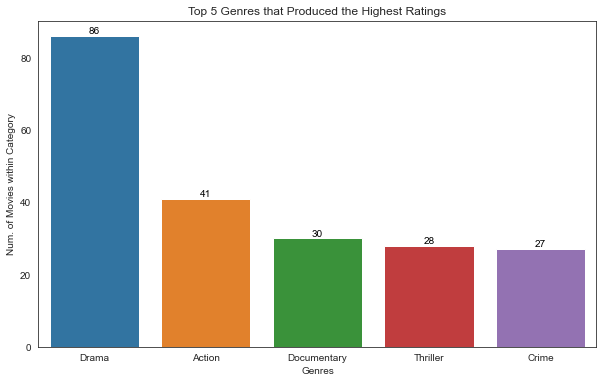

In [11]:
vis.top_5_genres(imdb);

### Runtime

- Include finding aka summary stat to support recommendation
- Explain why finding supports the recomendation
- Explains how rec would help new studio succeed

#### Runtime Visualization

- Help stakeholder understand value to project
- have labels and marks to aid visualization
- use color/size and or location ot facilitate comparisons

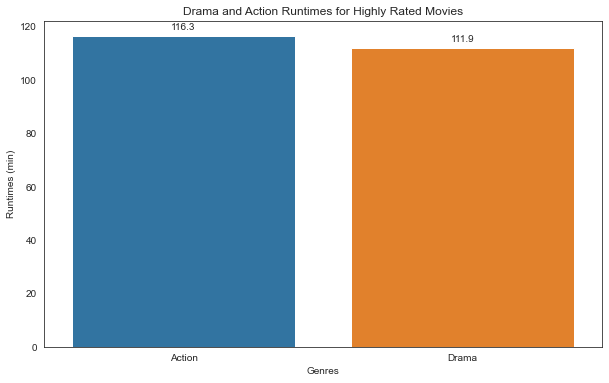

In [12]:
vis.runtime_minutes(imdb);

### Writers and Directors

- Include finding aka summary stat to support recommendation
- Explain why finding supports the recomendation
- Explains how rec would help new studio succeed

#### Writers and Directors Visualizations

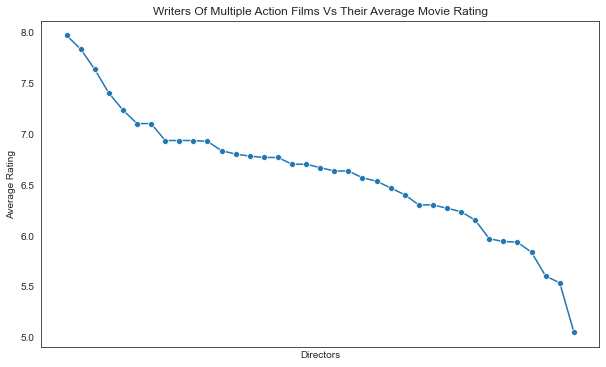

In [13]:
vis.directors_average_rating(imdb, imdb_name_basics_slim);

- Help stakeholder understand value to project
- have labels and marks to aid visualization
- use color/size and or location ot facilitate comparisons

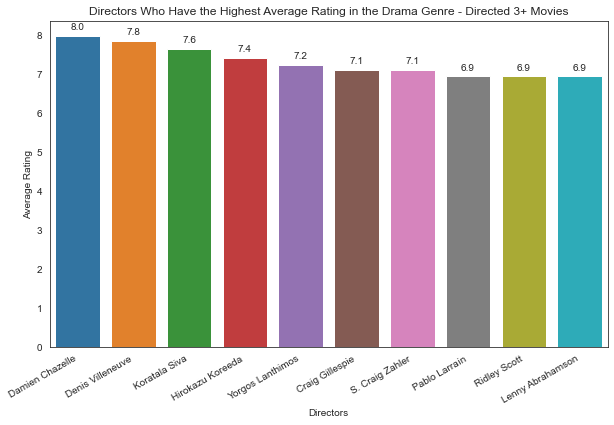

In [14]:
vis.top_10_directors_drama(imdb, imdb_name_basics_slim);

## Conclusions

This analysis leads to three recomendations for films to debut Microsoft's new movie studio
- ONE
- TWO
- THREE

## Next Steps

Additional analysis could yield further insight into helping direct how Microsoft should approach its movie creation
- ONE REC (ie. bring in gross information)
- TWO REC (uhh consider more international vs domestic data?)
- THREE REC (...ratings? More nuance in the genre with a larger dataset?)